# 131 分割回文串（hard）
输入：给定的字符串s  
输出：将s分割为字串，要求每个子串都是回文串，返回所有的分割方案

## 思路
两个关键问题：  
1. 切割问题：  
   - 切割其实就是找分割方式，遍历s中的元素分割成不同的段
   - 当切割到字符串的最后一个元素说明完成了一种切割的方法    
   - 而组合问题，是遍历s选取不同的组合   
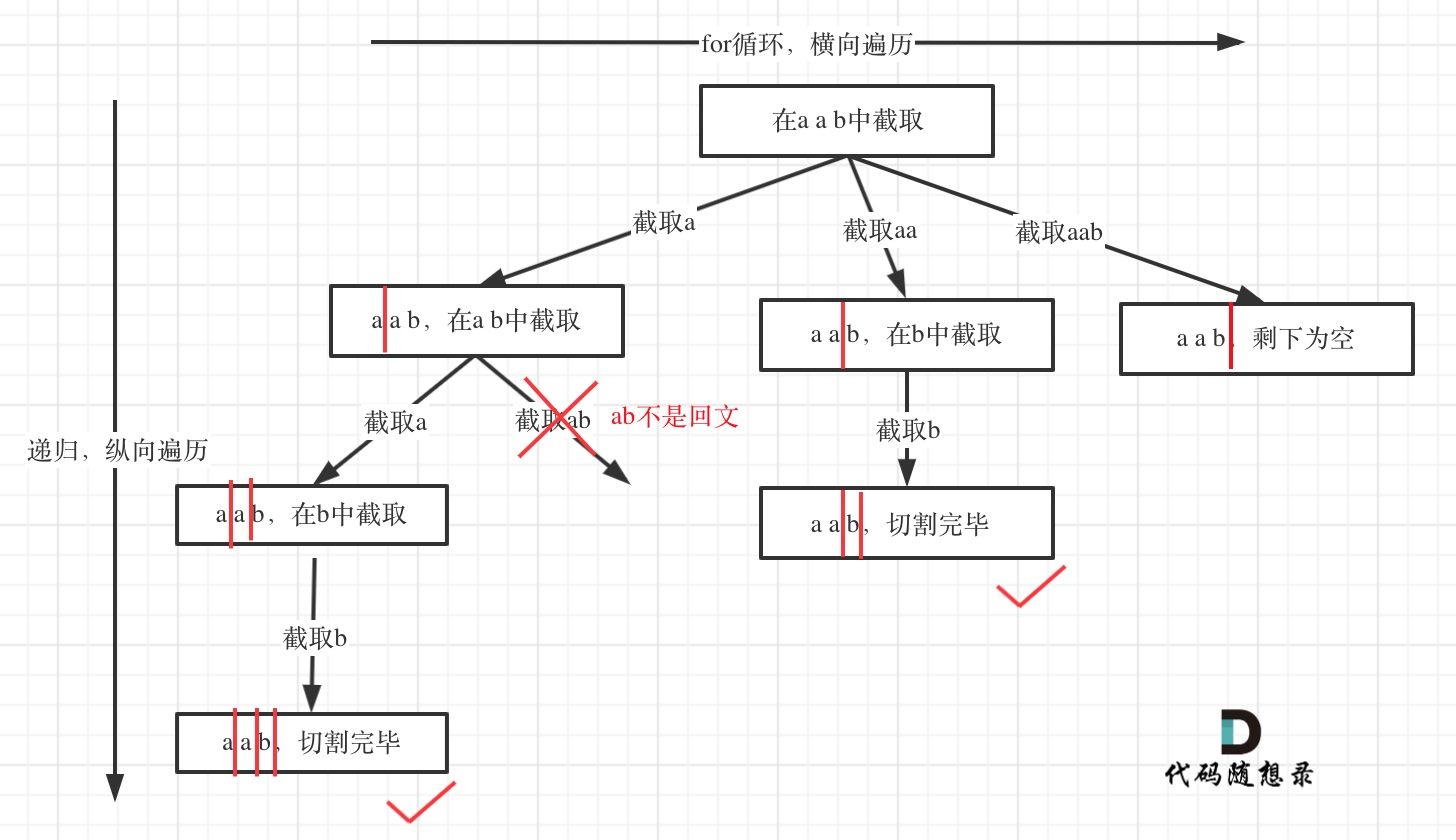  

2. 判断回文  

## 回溯三部曲
1. 递归函数参数
   - 全局参数：路径数组path存放切割后的回文的字串，result存放符合条件的结果  
   - 其他参数：startIndex给出当前字串的切割起始位置（切割线），确保切过的地方不重复切割  

2. 终止条件
   - 切割线切到了字符串最后面说明找到了一种切割方法，返回
   - startIndex >= len(s)

3. 单层搜索逻辑
   - 判断回文：是回文才加入路径  
   - 每次切割完成后，下次递归传入的元素为 i+1

### 判断回文
回文就是一个字符串从前往后和从后往前遍历得到的数组完全相同（对称）    

采用双指针：一个指针从前向后，一个指针从后向前，前后指针指向的元素相等则为回文字符串  

## 回文判定优化
更高效的计算一个字符串是否是回文子串  

长度为n的字符串s，是回文字符串的充分必要条件：s[0] == s[n-1] && s[1:n-2]是回文字符串  
- 也就是一个回文字符串的头和尾必须相等，而且去掉头尾元素必须仍是一个回文字符串 

动态规划这种算法的话, 我们可以高效地事先一次性计算出, 针对一个字符串s, 它的任何子串是否是回文字串, 然后在我们的回溯函数中直接查询即可, 省去了双指针移动判定这一步骤.

## 难点总结
- 切割问题可以抽象为组合问题
- 如何模拟那些切割线
- 切割问题中递归如何终止
- 在递归循环中如何截取子串
- 如何判断回文

In [ ]:
# 基础版，双指针判定回文
# python切片规则：s[start:end]
# 最终截取的元素范围是：[start, end)（数学上的左闭右开区间）

class Solution:
    def partition(self, s:str) -> list[list[int]]:
        '''
        递归用于纵向遍历
        for循环用于横向遍历
        当切割线迭代至字符串末尾，说明找到一种方法
        类似组合问题，为了不重复切割同一位置，需要start_index来做标记下一轮递归的起始位置(切割线)
        '''
        result = []
        self.backtracing(s, 0, [], result)
        return result

    def backtracing(self, s, startIndex, path, result):
        # base case :如果切割线到达字符串最后面就保存结果并返回
        if startIndex == len(s):
            result.append(path[:])
            return
        
        # 单层搜索逻辑
        for i in range(startIndex, len(s)):
            # 当前字串为[startIndex, i]
            # 判断其是否为回文字符串
            if self.is_palindrome(s, startIndex, i):
                path.append(s[startIndex: i+1])   # 左闭右开
                self.backtracing(s, i+1, path, result)   # 递归纵向遍历，从下一个元素i+1开始切割，判断剩下的切割串是否回文
                path.pop()   # 回溯撤销
        
    def is_palindrome(self, s:str, start:int, end:int) -> bool:
        i = start
        j = end
        while i < j:
            if s[i] != s[j]: return False   # 不相等立刻返回
            i += 1
            j += 1
        return True


In [ ]:
# 升级版，优化回文判断方式，直接正反序比较
# python切片的步长参数使用：s[start:end:step] 表示按照步长step截取s序列
# start和end都用：代替表示截取整个序列，step=-1表示直接反转

class Solution:
    def partition(self, s):
        result = []
        self.backtracing(s, 0, [], result)
        return result
    
    def backtracing(self, s, startIndex, path, result):
        if startIndex == len(s):
            result.append(path[:])
            return
        
        for i in range(startIndex, len(s)):
            # 正序==反序 说明是回文
            if s[startIndex: i+1] == s[startIndex: i+1][::-1]:
                path.append(s[startIndex: i+1])
                self.backtracing(s, i+1, path, result)
                path.pop()